In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CH4_KG_PER_KCF = 19.17

# Set matplotlib font:
plt.rcParams['font.family'] = 'Helvetica Neue'

In [2]:
def process_cost_function(
  price_ch4_per_kg: float,
  capex_per_kg: float,
  other_per_kg: float,
  kg_ch4_per_kg_product: float,
  profit: float = 0.1,
) -> float:
  total_cost = (price_ch4_per_kg*kg_ch4_per_kg_product + capex_per_kg + other_per_kg) * (1 + profit)
  return total_cost

process_cost_function(
  0.53,
  0.4,
  1.2,
  1.25,
  0.1,
)

2.4887500000000005

## Single Cell Protein

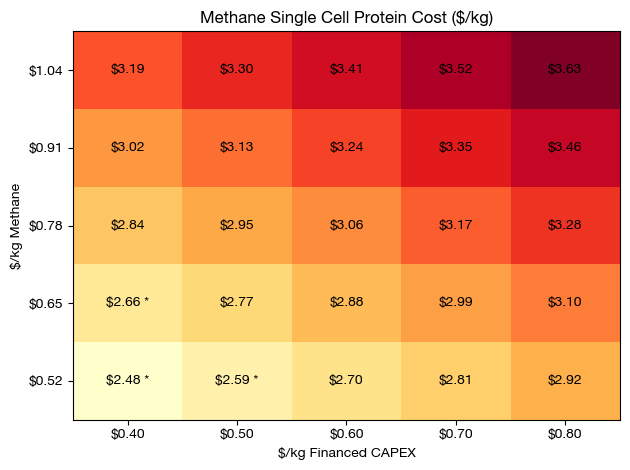

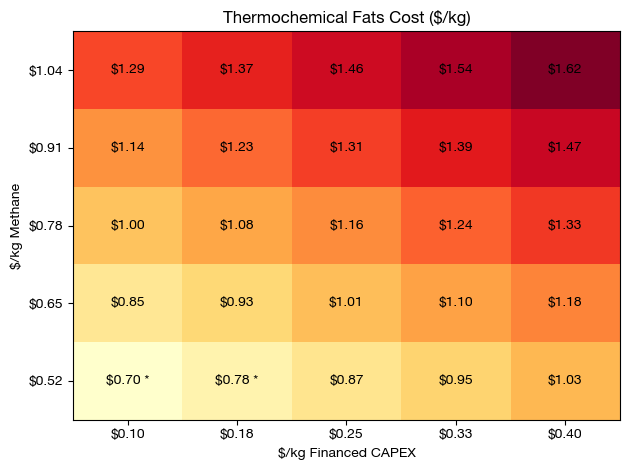

In [55]:
def graph(xs, ys, f: callable, bold_below: float, filename: str, title: str):
  x_axis_values = xs
  y_axis_values = ys
  X, Y = np.meshgrid(x_axis_values, y_axis_values)

  Z = np.zeros_like(X)
  for i in range(X.shape[0]):
    for j in range(X.shape[1]):
      x = X[i, j]
      y = Y[i, j]
      Z[i, j] = f(x, y)

  fig, ax = plt.subplots()
  # Reverse the color map:
  c = ax.pcolormesh(X, Y, Z, cmap='YlOrRd')
  # c = ax.pcolormesh(X, Y, Z, cmap='viridis')
  # fig.colorbar(c, ax=ax)

  plt.xlabel('$/kg Financed CAPEX')
  plt.ylabel('$/kg Methane')

  # Make the title bold:
  plt.title(title, fontweight='bold')

  plt.xticks(x_axis_values)
  plt.yticks(y_axis_values)

  # Format the x and y labels to include a $ sign:
  ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${x:.2f}'))
  ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, loc: f'${y:.2f}'))

  # Add labels to each sqaure:
  for i in range(X.shape[0]):
    for j in range(X.shape[1]):
      # check emoji: 
      # https://emojicombos.com/
      maybe_asterisk = ' *' if Z[i, j] < bold_below else ''
      plt.text(X[i, j], Y[i, j], f'${Z[i, j]:.2f}{maybe_asterisk}', color='black', ha='center', va='center', fontsize=10)

  # Add an outline to the squares with a value below the threshold:
  # for i in range(X.shape[0]):
  #   for j in range(X.shape[1]):
  #     if Z[i, j] < bold_below:
  #       # Add a black outline to the square:
  #       plt.gca().add_patch(plt.Rectangle((X[i, j]-0.05, Y[i, j]-0.05), 0.1, 0.1, fill=False, edgecolor='black', lw=1))

  plt.tight_layout()

  # Save the plot:
  plt.savefig(filename, dpi=300)

  plt.show()


f_scp = lambda capex, ch4_price: process_cost_function(ch4_price, capex, 1.2, 1.25, 0.1)
f_savor = lambda capex, ch4_price: process_cost_function(ch4_price, capex, 0, 1.03, 0.1)

# ch4_price_values = np.linspace(0.53, 2*0.53, 5)
min_ch4_price_per_kcf = 10
max_ch4_price_per_kcf = 20
min_ch4_price_per_kg = min_ch4_price_per_kcf / CH4_KG_PER_KCF
max_ch4_price_per_kg = max_ch4_price_per_kcf / CH4_KG_PER_KCF

ch4_price_values = np.linspace(min_ch4_price_per_kg, max_ch4_price_per_kg, 5)
capex_values_scp = np.linspace(0.4, 2*0.4, 5)
capex_values_savor = np.linspace(0.1, 0.4, 5)

graph(
  ys=ch4_price_values,
  xs=capex_values_scp,
  f=f_scp,
  bold_below=2.68,
  filename='scp_cost_per_kg.png',
  title='Methane Single Cell Protein Cost ($/kg)'
)

graph(
  ys=ch4_price_values,
  xs=capex_values_savor,
  f=f_savor,
  bold_below=0.80,
  filename='fats_cost_per_kg.png',
  title='Thermochemical Fats Cost ($/kg)'
)